# Predict Number of Upvotes

#### Problem description

An online question and answer platform has hired you as a data scientist to identify the best question authors on the platform. This identification will bring more insight into increasing the user engagement. Given the tag of the question, number of views received, number of answers, username and reputation of the question author, the problem requires you to predict the upvote count that the question will receive.


<b>Approach:</b>

1) Data Exploration  
2) Data summarization and correlation metrics  
3) Hypotheses on what features could be important  
4) Feature engineering 1  
5) Training naive models  
6) Grid search on naive models  
7) Feature Engineering 2  
8) Running models on engineered features  
9) Ensemble models  
10) Neural Networks  
11) Conclusion  
    
    

In [1]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import ElasticNet, Lasso, Ridge, SGDRegressor
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor, AdaBoostRegressor, RandomForestRegressor

In [2]:
import pandas as pd, numpy as np

In [3]:
train = pd.read_csv("train.csv")

In [4]:
test = pd.read_csv("test.csv")

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330045 entries, 0 to 330044
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   ID          330045 non-null  int64 
 1   Tag         330045 non-null  object
 2   Reputation  330045 non-null  int64 
 3   Answers     330045 non-null  int64 
 4   Username    330045 non-null  int64 
 5   Views       330045 non-null  int64 
 6   Upvotes     330045 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 17.6+ MB


In [6]:
train.describe()

,ID,Reputation,Answers,Username,Views,Upvotes
count,330045.000000,3.300450e+05,330045.000000,330045.000000,3.300450e+05,330045.000000
mean,235748.682789,7.773147e+03,3.917672,81442.888803,2.964507e+04,337.505358
std,136039.418471,2.706141e+04,3.579515,49215.100730,8.095646e+04,3592.441135
min,1.000000,0.000000e+00,0.000000,0.000000,9.000000e+00,0.000000
25%,117909.000000,2.820000e+02,2.000000,39808.000000,2.594000e+03,8.000000
50%,235699.000000,1.236000e+03,3.000000,79010.000000,8.954000e+03,28.000000
75%,353620.000000,5.118000e+03,5.000000,122559.000000,2.687000e+04,107.000000
max,471493.000000,1.042428e+06,76.000000,175738.000000,5.231058e+06,615278.000000


In [7]:
test.describe()

,ID,Reputation,Answers,Username,Views
count,141448.000000,1.414480e+05,141448.000000,141448.000000,1.414480e+05
mean,235743.073497,7.920927e+03,3.914873,81348.231117,2.984633e+04
std,136269.867118,2.791072e+04,3.577460,49046.098215,8.034374e+04
min,7.000000,0.000000e+00,0.000000,4.000000,9.000000e+00
25%,117797.000000,2.860000e+02,2.000000,40222.750000,2.608000e+03
50%,235830.000000,1.245000e+03,3.000000,78795.500000,8.977000e+03
75%,353616.000000,5.123000e+03,5.000000,122149.000000,2.698925e+04
max,471488.000000,1.042428e+06,73.000000,175737.000000,5.004669e+06


In [8]:
train.corr()

,ID,Reputation,Answers,Username,Views,Upvotes
ID,1.000000,0.008546,0.017448,0.000628,0.017400,0.006328
Reputation,0.008546,1.000000,0.066504,-0.041019,0.036455,0.266710
Answers,0.017448,0.066504,1.000000,-0.012197,0.498642,0.202033
Username,0.000628,-0.041019,-0.012197,1.000000,0.002306,-0.011970
Views,0.017400,0.036455,0.498642,0.002306,1.000000,0.437336
Upvotes,0.006328,0.266710,0.202033,-0.011970,0.437336,1.000000


In [9]:
import seaborn as sn
import matplotlib.pyplot as plt

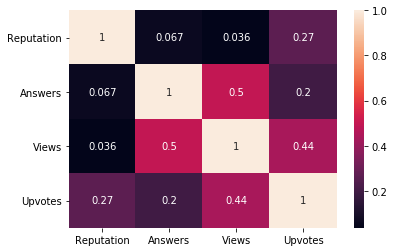

In [10]:
sn.heatmap(train[['Reputation', 'Answers', 'Views', 'Upvotes']].corr(), annot=True)
plt.show()

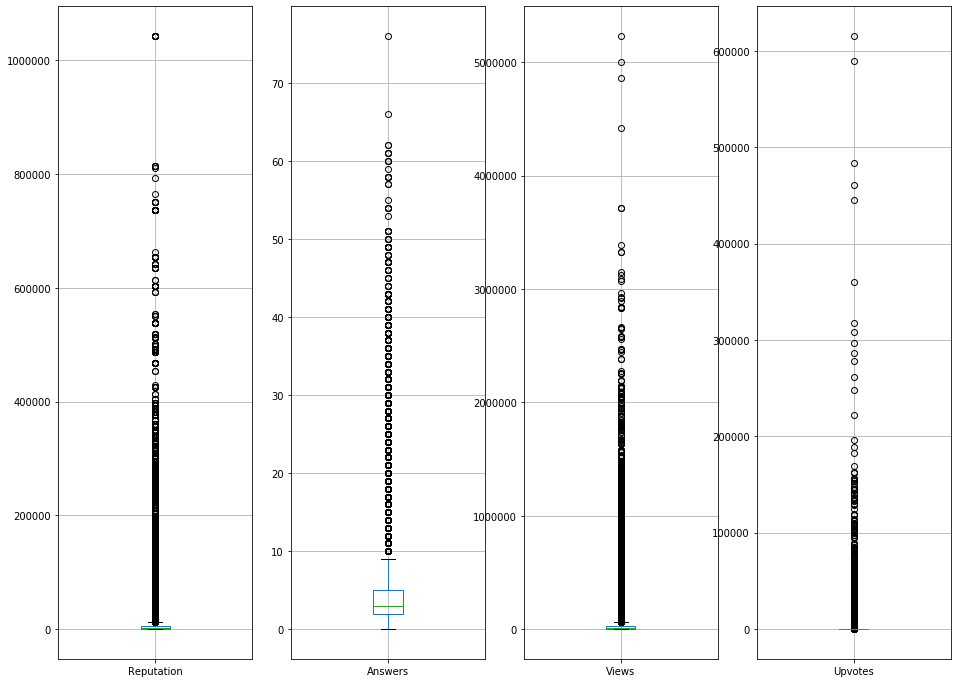

In [11]:
plt.figure(figsize = (16,12))
plt.subplot(1,4,1)
train[['Reputation']].boxplot()
plt.subplot(1,4,2)
train[['Answers']].boxplot()
plt.subplot(1,4,3)
train[['Views']].boxplot()
plt.subplot(1,4,4)
train[['Upvotes']].boxplot()


plt.show()

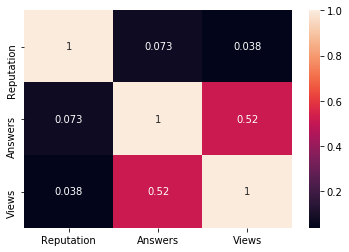

In [12]:
sn.heatmap(test[['Reputation', 'Answers', 'Views']].corr(), annot=True)
plt.show()

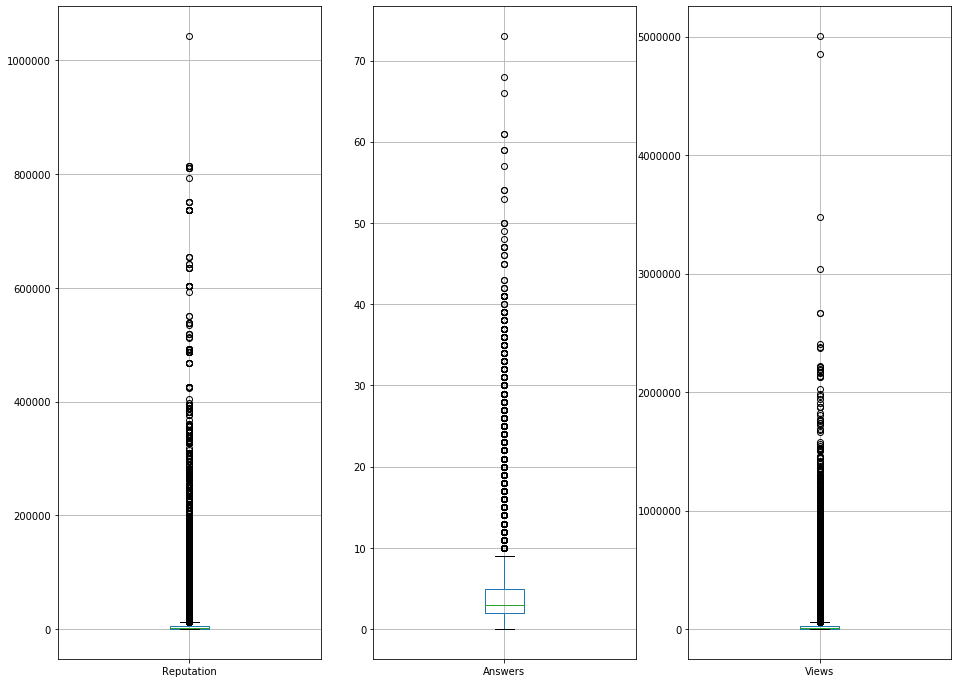

In [13]:
plt.figure(figsize = (16,12))
plt.subplot(1,3,1)
test[['Reputation']].boxplot()
plt.subplot(1,3,2)
test[['Answers']].boxplot()
plt.subplot(1,3,3)
test[['Views']].boxplot()

plt.show()

In [14]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [15]:
np.transpose(train.groupby('Tag').describe())

Tag                       a          c          h         i          j  \
ID         count   31695.00   72458.00   20564.00  32400.00   72232.00   
           mean   239590.35  237971.01  236766.82 220363.25  237764.33   
           std    134852.00  135463.81  135517.35 138577.13  136108.06   
           min         8.00       2.00      50.00     45.00       1.00   
           25%    124391.50  121625.75  119965.75  96069.50  120293.25   
           50%    241846.00  239311.50  236767.50 209093.50  239113.50   
           75%    353699.00  354858.50  353733.50 347671.75  355174.25   
           max    471493.00  471489.00  471413.00 471491.00  471485.00   
Reputation count   31695.00   72458.00   20564.00  32400.00   72232.00   
           mean     6065.17   10566.42    6985.07   5238.88    8285.53   
           std     24177.15   34647.71   25169.46  14956.31   28043.53   
           min         0.00       0.00       0.00      0.00       0.00   
           25%       269.00     343.00     166.00    318.00     327.00   
           50%      1098.00    1629.50     984.00   1243.00    1376.00   
           75%      4064.50    6900.00    4304.25   4421.00    5542.00   
           max    793888.00 1042428.00  613664.00 492627.00  813364.00   
Answers    count   31695.00   72458.00   20564.00  32400.00   72232.00   
           mean        4.26       4.05       3.78      3.68       4.35   
           std         4.00       3.40       3.35      3.64       3.99   
           min         0.00       0.00       0.00      0.00       0.00   
           25%         2.00       2.00       2.00      2.00       2.00   
           50%         3.00       3.00       3.00      3.00       3.00   
           75%         5.00       5.00       5.00      4.00       5.00   
           max        66.00      61.00      76.00     54.00      62.00   
Username   count   31695.00   72458.00   20564.00  32400.00   72232.00   
           mean    81496.35   80334.96   81933.63  78998.21   81861.39   
           std     49200.97   48874.87   49521.51  48496.36   49162.47   
           min         2.00       0.00      65.00      5.00       1.00   
           25%     39510.00   39503.25   40333.00  37315.50   40559.00   
           50%     79096.00   77063.50   79375.50  76728.00   79638.00   
           75%    122140.00  120346.75  123313.75 119490.00  122946.00   
           max    175728.00  175734.00  175729.00 175732.00  175738.00   
Views      count   31695.00   72458.00   20564.00  32400.00   72232.00   
           mean    31800.92   26746.68   33948.96  15806.68   43291.21   
           std     78193.97   64808.03   94089.51  29315.39  108631.63   
           min        18.00      15.00      11.00     21.00       9.00   
           25%      4371.00    2302.00    1912.75   2417.00    4541.00   
           50%     12822.00    8405.00    8111.00   6246.50   14471.00   
           75%     32387.50   25584.75   28524.00  16422.00   40594.25   
           max   4858537.00 2144703.00 4417626.00 579839.00 5231058.00   
Upvotes    count   31695.00   72458.00   20564.00  32400.00   72232.00   
           mean      316.46     327.57     384.72    117.39     540.36   
           std      3106.29    2822.39    4290.59    570.53    5661.36   
           min         0.00       0.00       0.00      0.00       0.00   
           25%        12.00       9.00       5.00      7.00      12.00   
           50%        35.00      33.00      20.00     20.00      42.00   
           75%       115.00     127.00      95.25     66.00     169.00   
           max    308308.00  360073.00  445709.00  25986.00  615278.00   

Tag                      o          p         r          s         x  
ID         count  14546.00   43407.00  12442.00   23323.00   6978.00  
           mean  236318.98  237951.32 236191.36  232761.90 237098.15  
           std   136632.13  135129.39 135782.65  136387.16 135216.89  
           min       24.00       3.00     37.00       6.00    124.00  
           25%   1

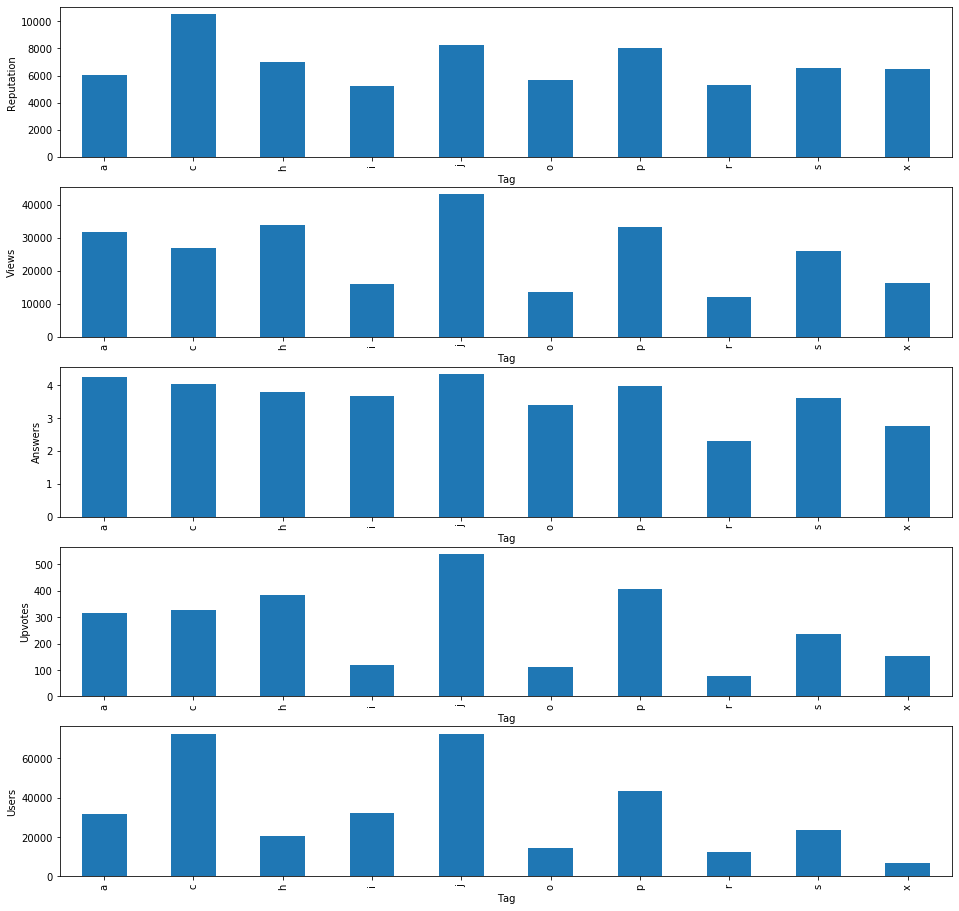

In [16]:
plt.figure(figsize = (16,16))
plt.subplot(5,1,1)
train.groupby('Tag')['Reputation'].mean().plot.bar()
plt.ylabel('Reputation')
plt.subplot(5,1,2)
train.groupby('Tag')['Views'].mean().plot.bar()
plt.ylabel('Views')
plt.subplot(5,1,3)
train.groupby('Tag')['Answers'].mean().plot.bar()
plt.ylabel('Answers')
plt.subplot(5,1,4)
train.groupby('Tag')['Upvotes'].mean().plot.bar()
plt.ylabel('Upvotes')
plt.subplot(5,1,5)
train.groupby('Tag')['Username'].count().plot.bar()
plt.ylabel('Users')

plt.show()

## Modeling

Models used and why? {TBU}

Encoding the categorical column

In [20]:
train.Tag.unique()

array(['a', 'c', 'r', 'j', 'p', 's', 'h', 'o', 'i', 'x'], dtype=object)

In [21]:
test.Tag.unique()

array(['a', 'c', 'i', 'x', 's', 'p', 'o', 'j', 'h', 'r'], dtype=object)

In [22]:
ohe = pd.get_dummies(train.Tag)
ohe_test = pd.get_dummies(test.Tag)

In [23]:
ohe, ohe_test

(        a  c  h  i  j  o  p  r  s  x
 0       1  0  0  0  0  0  0  0  0  0
 1       1  0  0  0  0  0  0  0  0  0
 2       0  1  0  0  0  0  0  0  0  0
 3       1  0  0  0  0  0  0  0  0  0
 4       0  1  0  0  0  0  0  0  0  0
 ...    .. .. .. .. .. .. .. .. .. ..
 330040  0  1  0  0  0  0  0  0  0  0
 330041  0  1  0  0  0  0  0  0  0  0
 330042  0  1  0  0  0  0  0  0  0  0
 330043  0  0  0  0  1  0  0  0  0  0
 330044  0  0  0  0  1  0  0  0  0  0
 
 [330045 rows x 10 columns],
         a  c  h  i  j  o  p  r  s  x
 0       1  0  0  0  0  0  0  0  0  0
 1       0  1  0  0  0  0  0  0  0  0
 2       0  0  0  1  0  0  0  0  0  0
 3       0  0  0  1  0  0  0  0  0  0
 4       0  0  0  1  0  0  0  0  0  0
 ...    .. .. .. .. .. .. .. .. .. ..
 141443  0  0  0  0  1  0  0  0  0  0
 141444  0  0  0  0  1  0  0  0  0  0
 141445  0  0  0  0  0  0  1  0  0  0
 141446  0  0  0  0  0  1  0  0  0  0
 141447  1  0  0  0  0  0  0  0  0  0
 
 [141448 rows x 10 columns])

In [24]:
train.shape, test.shape

((330045, 7), (141448, 6))

In [25]:
#train2 = pd.concat([train, ohe], axis = 1)
test2 = pd.concat([test, ohe_test], axis = 1)

In [26]:
(train2.columns, test2.columns)

(Index(['ID', 'Tag', 'Reputation', 'Answers', 'Username', 'Views', 'Upvotes',
        'a', 'c', 'h', 'i', 'j', 'o', 'p', 'r', 's', 'x'],
       dtype='object'),
 Index(['ID', 'Tag', 'Reputation', 'Answers', 'Username', 'Views', 'a', 'c',
        'h', 'i', 'j', 'o', 'p', 'r', 's', 'x'],
       dtype='object'))

In [219]:
xtrain2 = pd.concat([train2.iloc[:,:6],train2.iloc[:,7:]], axis = 1)
xtrain2.drop(['ID','Tag','Username'],axis =1,  inplace = True)
xtest2 = pd.concat([test2.iloc[:,:6],test2.iloc[:,6:]], axis = 1)
xtest2.drop(['ID','Tag','Username'],axis =1,  inplace = True)

In [38]:
ytrain2 = train2.iloc[:,6].ravel()

In [220]:
xtrain2.shape, ytrain2.shape, xtest2.shape

((330045, 13), (330045,), (141448, 13))

#### Setting K folds

In [160]:
from sklearn.model_selection import StratifiedKFold, KFold

In [41]:
skf = StratifiedKFold(n_splits = 5, shuffle=True, random_state=123)

In [318]:
kf = KFold(n_splits=20, shuffle=True, random_state=123)

#### Running the models

 Random Forest 

In [143]:
reg = RandomForestRegressor(n_estimators = 100)
X = xtrain2
y = ytrain2
cv_score = (cross_val_score(reg, X,y, cv = 5, scoring='neg_root_mean_squared_error'))
cv_score, np.mean(cv_score)


(array([-1519.77211081, -1231.23997933, -1193.53353075, -1025.3389772 ,
        -1717.54839069]),
 -1337.4865977540796)

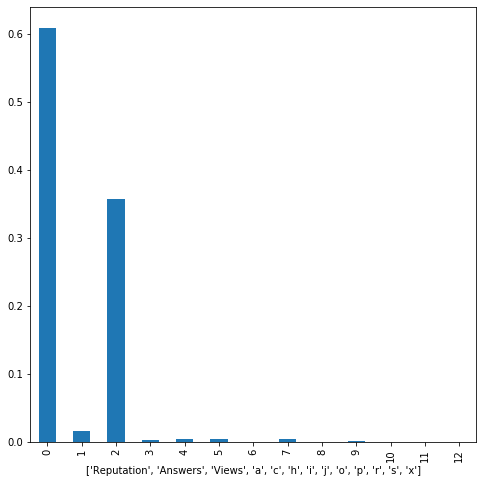

In [144]:
reg.fit(xtrain2,ytrain2)
plt.figure(figsize=(15,6))
plt.bar(xtrain2.columns, pd.Series(reg.feature_importances_))
plt.show()

Gradient Boosting

In [145]:
reg = GradientBoostingRegressor(n_estimators = 100)
X = xtrain2
y = ytrain2
cv_score = cross_val_score(reg, X,y, cv = 5, scoring='neg_root_mean_squared_error')
cv_score, np.mean(cv_score)


(array([-1567.59868236, -1022.6515348 , -1139.25692658, -1167.72023242,
        -1428.54243038]),
 -1265.1539613074742)

Bagging Regressor

In [146]:
reg = BaggingRegressor(n_estimators = 100)
X = xtrain2
y = ytrain2
cv_score = (cross_val_score(reg, X,y, cv = 5, scoring='neg_root_mean_squared_error'))
cv_score, np.mean(cv_score)

(array([-1550.31588991, -1156.52637659, -1124.87635191,  -989.26750799,
        -1606.9323368 ]),
 -1285.583692639357)

 AdaBoost Regressor

In [147]:
reg = AdaBoostRegressor(n_estimators = 100)
X = xtrain2
y = ytrain2
cv_score = (cross_val_score(reg, X,y, cv = 5, scoring='neg_root_mean_squared_error'))
cv_score, np.mean(cv_score)

(array([-8415.95785578, -5384.4446662 , -3941.51485729, -7254.65167288,
        -2426.95760053]),
 -5484.705330536436)

 Hist Gradient Boosting

In [148]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

In [149]:
reg =  HistGradientBoostingRegressor()
X = xtrain2
y = ytrain2
cv_score = (cross_val_score(reg, X,y, cv = 5, scoring='neg_root_mean_squared_error'))
cv_score, np.mean(cv_score)

(array([-2417.87372835, -2006.10898019, -1852.87502594, -1703.06276169,
        -1857.45477096]),
 -1967.4750534268999)

Light GBM

In [150]:
from lightgbm import LGBMRegressor

In [151]:
reg = LGBMRegressor(n_estimators = 100)
X = xtrain2
y = ytrain2
cv_score = (cross_val_score(reg, X,y, cv = 5, scoring='neg_root_mean_squared_error'))
cv_score, np.mean(cv_score)

(array([-2297.39402958, -2033.21314988, -1905.48350618, -1853.61994312,
        -1904.64168685]),
 -1998.8704631214507)

XGBoost

In [152]:
import xgboost as xgb
from xgboost import XGBRegressor

In [153]:
dtrain = xgb.DMatrix(xtrain2, label = ytrain2)
#para_grid = {'lambda': 1.0, 'alpha': 1.0}

In [154]:
reg = XGBRegressor(n_estimators=100, objective='reg:squarederror')

In [155]:
cv_score = (cross_val_score(reg, X,y, cv = 5, scoring='neg_root_mean_squared_error'))
cv_score, np.mean(cv_score)

(array([-1623.85516207, -1070.60307534, -1199.50007313, -1170.79239018,
        -1487.57675142]),
 -1310.4654904268634)

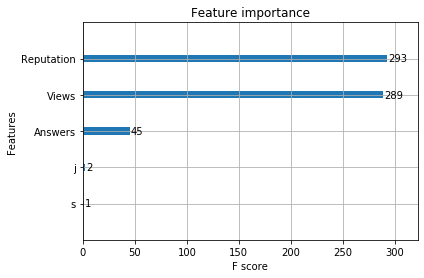

In [156]:
reg.fit(xtrain2, ytrain2)
xgb.plot_importance(reg, )
plt.show()

In [157]:
reg = SGDRegressor()
cv_score = (cross_val_score(reg, X,y, cv = 5, scoring='neg_root_mean_squared_error'))
cv_score, np.mean(cv_score)

(array([-2.48898241e+17, -1.15485171e+18, -8.84206570e+17, -5.48389309e+18,
        -8.99742951e+18]),
 -3.3538558238904023e+18)

 Summary of base models using cross_val_score and cv = 5 (100 estimators wherever applicable):
 
    * Gradient Boosting Regressor [1265]
    * Random Forest Regressor [1273]
    * XGBoost Regressor [1310]
    * BaggingRegressor [1337]
    * HistGradientBoosting [1967]
    * LightGBMRegressor [1998]
    * AdaBoostRegressor [>5000]


##### Running the same models with a KFold validation approach

Random Forest

In [320]:

scores = []
for train_index, test_index in kf.split(xtrain2):
    X_train, X_test = xtrain2.loc[train_index], xtrain2.loc[test_index]
    y_train, y_test = ytrain2[train_index], ytrain2[test_index]

    model1 = RandomForestRegressor(n_estimators=200)
    model1.fit(X_train, y_train, )

    y_pred = model1.predict(X_test)

    scores.append(np.sqrt(np.mean((y_pred-y_test)**2)))
    
scores, np.mean(scores)

([1302.7674349464594,
  1421.5163812987525,
  1276.0295068178768,
  1238.3377926032847,
  1844.5894443624131,
  940.8702912895725,
  724.0853584660154,
  835.4638216836539,
  3044.6596811122495,
  787.303115279555,
  829.6531486181757,
  617.0672008204724,
  636.2882263404722,
  1729.4898077080613,
  601.3210108928214,
  750.8105600047015,
  1037.484280625655,
  1516.5870792503308,
  1542.0763727646563,
  726.5064795121784],
 1170.145349719868)

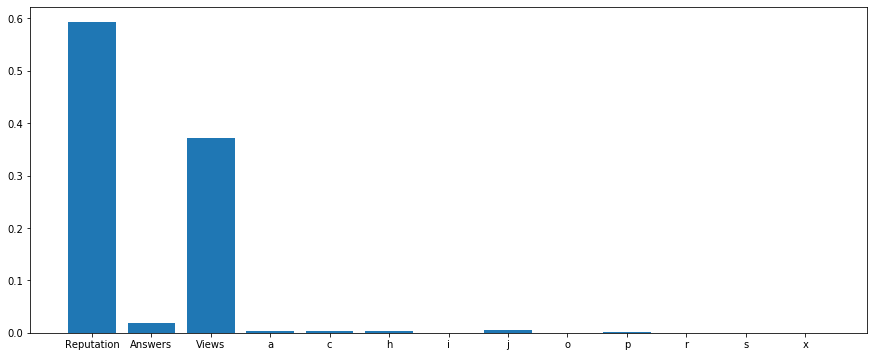

In [321]:
plt.figure(figsize=(15,6))
plt.bar(xtrain2.columns, pd.Series(model1.feature_importances_))
plt.show()

Gradient Boosting

In [322]:

scores = []
for train_index, test_index in kf.split(xtrain2):
    X_train, X_test = xtrain2.loc[train_index], xtrain2.loc[test_index]
    y_train, y_test = ytrain2[train_index], ytrain2[test_index]

    model2 = GradientBoostingRegressor(n_estimators=200)
    model2.fit(X_train, y_train, )

    y_pred = model2.predict(X_test)

    scores.append(np.sqrt(np.mean((y_pred-y_test)**2)))
    
scores, np.mean(scores)

([1115.8559784637544,
  1445.8320164113131,
  1295.8736160886117,
  989.8675052273564,
  2009.7055210492595,
  808.1962386794419,
  794.5973789297444,
  787.347468710216,
  3010.8009890218163,
  925.8459499581861,
  984.3210174426177,
  639.6645042206742,
  791.644764305131,
  1987.3419798659138,
  601.6353999130464,
  732.8079676921685,
  755.977894757189,
  1300.9943073503605,
  1191.5147108446047,
  702.3095221363333],
 1143.6067365533868)

Bagging Regressor

In [323]:

scores = []
for train_index, test_index in kf.split(xtrain2):
    X_train, X_test = xtrain2.loc[train_index], xtrain2.loc[test_index]
    y_train, y_test = ytrain2[train_index], ytrain2[test_index]

    model3 = BaggingRegressor(n_estimators=200)
    model3.fit(X_train, y_train, )

    y_pred = model3.predict(X_test)

    scores.append(np.sqrt(np.mean((y_pred-y_test)**2)))
    
scores, np.mean(scores)

([1271.9850808894346,
  1393.270087152412,
  1282.8606285125513,
  1233.0824481941133,
  1817.480550654015,
  931.4228602468829,
  729.0564622644337,
  835.3030217896996,
  3141.178636657912,
  801.5865567767909,
  836.9808207485788,
  641.650874787751,
  621.3733794505588,
  1729.9155985677492,
  586.9523653505756,
  770.4427418833803,
  1082.8989077573253,
  1470.1383688176284,
  1552.7777157720882,
  707.1722096942594],
 1171.876465798407)

Ada Boost

In [324]:

scores = []
for train_index, test_index in kf.split(xtrain2):
    X_train, X_test = xtrain2.loc[train_index], xtrain2.loc[test_index]
    y_train, y_test = ytrain2[train_index], ytrain2[test_index]

    model4 = AdaBoostRegressor(n_estimators=200)
    model4.fit(X_train, y_train, )

    y_pred = model4.predict(X_test)

    scores.append(np.sqrt(np.mean((y_pred-y_test)**2)))
    
scores, np.mean(scores)

([7960.997904112408,
  3548.2156792374935,
  4052.5266872657785,
  8768.479732836015,
  9080.57349418041,
  9204.968057534164,
  9199.684230268707,
  6546.368013754269,
  10558.188490600678,
  8774.059230577102,
  7768.034821438503,
  8977.491675526815,
  7486.473686829903,
  4936.386062886099,
  8732.52446996775,
  11108.553839397933,
  6699.167905881466,
  11827.922785356624,
  11032.536567400932,
  3249.7628686460366],
 7975.645810184955)

Light GBM

In [325]:

scores = []
for train_index, test_index in kf.split(xtrain2):
    X_train, X_test = xtrain2.loc[train_index], xtrain2.loc[test_index]
    y_train, y_test = ytrain2[train_index], ytrain2[test_index]

    model5 = LGBMRegressor(n_estimators=200)
    model5.fit(X_train, y_train, )

    y_pred = model5.predict(X_test)

    scores.append(np.sqrt(np.mean((y_pred-y_test)**2)))
    
scores, np.mean(scores)

([1600.197666845921,
  1701.1192395083576,
  1690.1264046731287,
  2079.6780193110226,
  3692.040204326218,
  2117.0185547536344,
  1217.2173009401827,
  909.6744165510023,
  3824.659287957428,
  1570.325155500829,
  1593.3963087120271,
  801.0859465979313,
  2194.497652533069,
  2437.842594036989,
  892.8901012252601,
  1253.5712265603,
  2404.724139640091,
  1872.162253238192,
  2980.5397060148084,
  1487.4058662694408],
 1916.008602259792)

XGBoost

In [326]:

scores = []
for train_index, test_index in kf.split(xtrain2):
    X_train, X_test = xtrain2.loc[train_index], xtrain2.loc[test_index]
    y_train, y_test = ytrain2[train_index], ytrain2[test_index]

    model6 = XGBRegressor(n_estimators=200)
    model6.fit(X_train, y_train, )

    y_pred = model6.predict(X_test)

    scores.append(np.sqrt(np.mean((y_pred-y_test)**2)))
    
scores, np.mean(scores)

[07:24:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:25:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:26:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:26:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:27:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:28:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:29:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:30:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:30:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

([1115.7361400517595,
  1442.8895232212183,
  1328.937527206337,
  1183.0725672208928,
  2090.6773602118324,
  776.3238159065427,
  894.7586590819727,
  774.1607022959852,
  3101.0043573774237,
  922.150138422699,
  925.1399886501625,
  624.6725463071907,
  754.2302233105198,
  1841.4295404428924,
  638.2596777070928,
  736.2322363136176,
  864.2735504132518,
  1286.541234420694,
  1266.0939961189565,
  646.3866854437266],
 1160.6485235062382)

<Figure size 1152x576 with 0 Axes>

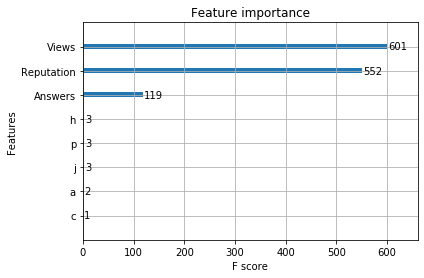

In [328]:
plt.figure(figsize = (16,8))
xgb.plot_importance(model6)
plt.show()


Summary of base models using KFoldCV and cv = 5 (100 estimators wherever applicable):

    * Gradient Boosting Regressor [1226]
    * Random Forest Regressor [1301]
    * XGBoost Regressor [1247]
    * BaggingRegressor [1266]
    * LightGBMRegressor [2004]
    * AdaBoostRegressor [>6300]

> 200 estimators

    * Gradient Boosting Regressor [1216]
    * Random Forest Regressor [1277]
    * XGBoost Regressor [1236]
    * BaggingRegressor [1303]
    * LightGBMRegressor [2045]
    * AdaBoostRegressor [>8000]  
    
CV = 20

    * Gradient Boosting Regressor [1143]
    * Random Forest Regressor [1170]
    * XGBoost Regressor [1160]
    * BaggingRegressor [1170]
    * LightGBMRegressor [1916]
    * AdaBoostRegressor [7975]  
  


Prediction using new CV scores and fits

In [330]:
model1.fit(xtrain2, ytrain2)
model1_pred = model1.predict(xtest2)

# Clip the negative values to 0
model1_prediction = pd.DataFrame({'ID': test.ID, 'Upvotes': model1_pred})
model1_prediction.Upvotes = model1_prediction.Upvotes.clip(0)
model1_prediction.to_csv("model1_prediction.csv", index_label = False)

In [331]:
model2.fit(xtrain2, ytrain2)
model2_pred = model2.predict(xtest2)

# Clip the negative values to 0
model2_prediction = pd.DataFrame({'ID': test.ID, 'Upvotes': model2_pred})
model2_prediction.Upvotes = model2_prediction.Upvotes.clip(0)
model2_prediction.to_csv("model2_prediction.csv", index_label = False)

In [332]:
model3.fit(xtrain2, ytrain2)
model3_pred = model3.predict(xtest2)

# Clip the negative values to 0
model3_prediction = pd.DataFrame({'ID': test.ID, 'Upvotes': model3_pred})
model3_prediction.Upvotes = model3_prediction.Upvotes.clip(0)
model3_prediction.to_csv("model3_prediction.csv", index_label = False)

In [333]:
model4.fit(xtrain2, ytrain2)
model4_pred = model4.predict(xtest2)

# Clip the negative values to 0
model4_prediction = pd.DataFrame({'ID': test.ID, 'Upvotes': model4_pred})
model4_prediction.Upvotes = model4_prediction.Upvotes.clip(0)
model4_prediction.to_csv("model4_prediction.csv", index_label = False)

In [334]:
model5.fit(xtrain2, ytrain2)
model5_pred = model5.predict(xtest2)

# Clip the negative values to 0
model5_prediction = pd.DataFrame({'ID': test.ID, 'Upvotes': model5_pred})
model5_prediction.Upvotes = model5_prediction.Upvotes.clip(0)
model5_prediction.to_csv("model5_prediction.csv", index_label = False)

In [335]:
model6.fit(xtrain2, ytrain2)
model6_pred = model6.predict(xtest2)

# Clip the negative values to 0
model6_prediction = pd.DataFrame({'ID': test.ID, 'Upvotes': model6_pred})
model6_prediction.Upvotes = model6_prediction.Upvotes.clip(0)
model6_prediction.to_csv("model6_prediction.csv", index_label = False)

[17:24:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


<b><u>Observations so far</u>: <br>Bagging </b> fit predictions provide the best results for the problem, most likely due to the reduced effect of outliers in the data

### Predicting using best base models - more trees

Random Forest

In [347]:
scores = []
for train_index, test_index in kf.split(xtrain2):
    X_train, X_test = xtrain2.loc[train_index], xtrain2.loc[test_index]
    y_train, y_test = ytrain2[train_index], ytrain2[test_index]

    model10 = RandomForestRegressor(n_estimators=300, random_state=13)
    model10.fit(X_train, y_train)

    y_pred = model10.predict(X_test)

    scores.append(np.sqrt(np.mean((y_pred-y_test)**2)))
    
scores, np.mean(scores)

([1288.2102209003003,
  1408.185679934436,
  1273.6576207041041,
  1221.6303227786623,
  1787.2668597034872,
  903.5577949692856,
  731.4490721331298,
  831.5021318354371,
  3032.287753552384,
  788.9893381485952,
  835.2510751466776,
  649.0755575714603,
  609.1642577483863,
  1731.9815483856391,
  587.3161036827455,
  755.2787224179932,
  1119.2353650886255,
  1551.1582269512187,
  1707.4009553970661,
  736.62163207556],
 1177.4610119562597)

GB, 300 estimators, 1236  
GB, 500 estimators, 1228  
GB, 1000 estimators, 1234


In [348]:
model10.fit(xtrain2, ytrain2)
model10_pred = model10.predict(xtest2)

# Clip the negative values to 0
model10_prediction = pd.DataFrame({'ID': test.ID, 'Upvotes': model10_pred})
model10_prediction.Upvotes = model10_prediction.Upvotes.clip(0)
model10_prediction.to_csv("model10_prediction.csv", index_label = False)

Bagging Regressor

In [349]:
scores = []
for train_index, test_index in kf.split(xtrain2):
    X_train, X_test = xtrain2.loc[train_index], xtrain2.loc[test_index]
    y_train, y_test = ytrain2[train_index], ytrain2[test_index]

    model11 = BaggingRegressor(n_estimators=300, random_state=23)
    model11.fit(X_train, y_train, )

    y_pred = model11.predict(X_test)

    scores.append(np.sqrt(np.mean((y_pred-y_test)**2)))
    
scores, np.mean(scores)

([1349.2262758431707,
  1445.0457646095342,
  1301.3589060008846,
  1149.5174282597345,
  1879.0119223629792,
  915.60599921235,
  753.7518736686324,
  832.1322893768432,
  3082.297824526951,
  790.9289616520201,
  843.694705783067,
  639.0435733217296,
  608.430489845115,
  1693.2252598326902,
  585.1454990878411,
  750.6374597654076,
  1073.703800294649,
  1522.1946517495876,
  1582.250855556863,
  756.516533944503],
 1177.6860037347276)

XGB, 300 estimators, 1244  
XGB, 500 estimators, 1255  
XGB, 1000 estimators, 1296

In [350]:
model11.fit(xtrain2, ytrain2)
model11_pred = model11.predict(xtest2)

# Clip the negative values to 0
model11_prediction = pd.DataFrame({'ID': test.ID, 'Upvotes': xgb_pred})
model11_prediction.Upvotes = model11_prediction.Upvotes.clip(0)
model11_prediction.to_csv("model11_prediction.csv", index_label = False)

<b>Best prediction so far:
    
    Bagging Regressor with 200 estimators --> 1156 (AV public score)
    RandomForest Regressor (200 estimators)-> 1157
</b>

 🙃

### Feature enhancement

Based on the performance of models above, we can look to make adjustments to the data to manage the outliers

<h1> <font color = 'red'> To be formatted and organized (Everything below this cell) </font></h1>
Not part of final solution!!!


##### Based on Views

Scale of a view relative to the mean| median view for that category

In [261]:
train_sub = train
test_sub = test

In [301]:
# Using mean to get the scaled value - Views
train3 = pd.merge(train, train_sub.groupby(['Tag']).mean()['Views'], on="Tag")
train3['View_scaled'] = train3.Views_x / train3.Views_y
train3.drop('Views_y', axis = 1, inplace = True)

test3 = pd.merge(test, test_sub.groupby(['Tag']).mean()['Views'], on="Tag")
test3['View_scaled'] = test3.Views_x / test3.Views_y
test3.drop('Views_y', axis = 1, inplace = True)


# Reputation

train3 = pd.merge(train3, train_sub.groupby(['Tag']).mean()['Reputation'], on="Tag")
train3['Rep_scaled'] = train3.Reputation_x / train3.Reputation_y
train3.drop('Reputation_y', axis = 1, inplace = True)


# Answers

train3 = pd.merge(train3, train_sub.groupby(['Tag']).mean()['Answers'], on="Tag")
train3['ans_scaled'] = train3.Answers_x / train3.Answers_y
train3.drop('Answers_y', axis = 1, inplace = True)



In [302]:
train3 = pd.concat([train3, ohe], axis = 1)
test3 = pd.concat([test3, ohe_test], axis = 1)

train3.drop(['ID','Username','Tag', 'Views_x', 'Answers_x', 'Reputation_x'], axis = 1, inplace = True)
test3.drop(['ID','Username','Tag'], axis = 1, inplace = True)
xtrain3 = train3.iloc[:,1:]
ytrain3 = train3.Upvotes.ravel()
xtest3 = test3


In [304]:
train3

,Upvotes,View_scaled,Rep_scaled,ans_scaled,a,c,h,i,j,o,p,r,s,x
0,42,0.25,0.65,0.47,1,0,0,0,0,0,0,0,0,0
1,1175,1.75,4.29,2.82,1,0,0,0,0,0,0,0,0,0
2,9,0.85,0.04,0.70,0,1,0,0,0,0,0,0,0,0
3,8,0.70,0.06,0.70,1,0,0,0,0,0,0,0,0,0
4,363,1.46,1.49,0.47,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330040,11,0.06,0.50,0.36,0,1,0,0,0,0,0,0,0,0
330041,9,0.06,0.61,0.36,0,1,0,0,0,0,0,0,0,0
330042,10,2.42,0.02,1.08,0,1,0,0,0,0,0,0,0,0
330043,91,0.26,3.22,1.81,0,0,0,0,1,0,0,0,0,0


Gradient Boosting


In [305]:
scores = []
for train_index, test_index in kf.split(xtrain3):
    X_train, X_test = xtrain3.loc[train_index], xtrain3.loc[test_index]
    y_train, y_test = ytrain3[train_index], ytrain3[test_index]

    model = GradientBoostingRegressor(n_estimators=300, random_state=13)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    scores.append(np.sqrt(np.mean((y_pred-y_test)**2)))
    
scores, np.mean(scores)

([1463.14363848644,
  1651.9914685340154,
  1773.7665723856944,
  1512.2501194442261,
  1256.1647924818344],
 1531.4633182664422)

In [306]:
model.fit(xtrain3, ytrain3)
gb_pred = model.predict(xtest2)

# Clip the negative values to 0
gb_prediction = pd.DataFrame({'ID': test.ID, 'Upvotes': gb_pred})
gb_prediction.Upvotes = gb_prediction.Upvotes.clip(0)
gb_prediction.to_csv("gb_prediction3.csv", index_label = False)

XGBoost

In [307]:
scores = []
for train_index, test_index in kf.split(xtrain3):
    X_train, X_test = xtrain3.loc[train_index], xtrain3.loc[test_index]
    y_train, y_test = ytrain3[train_index], ytrain3[test_index]

    model = XGBRegressor(n_estimators=300, random_state=13)
    model.fit(X_train, y_train, )

    y_pred = model.predict(X_test)

    scores.append(np.sqrt(np.mean((y_pred-y_test)**2)))
    
scores, np.mean(scores)

[03:10:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:11:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:12:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:13:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:14:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


([1417.7619182362052,
  1621.9609125787917,
  1632.3970592275814,
  1466.475834202726,
  1220.6975472780473],
 1471.8586543046706)

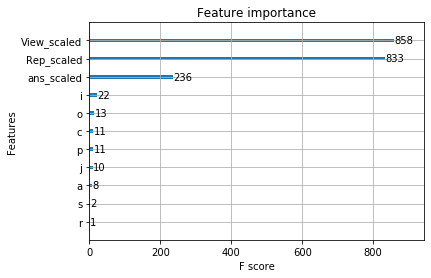

In [308]:
xgb.plot_importance(model)
plt.show()

In [309]:
model.fit(xtrain3, ytrain3)
xgb_pred = model.predict(xtest3)

# Clip the negative values to 0
xgb_prediction = pd.DataFrame({'ID': test.ID, 'Upvotes': xgb_pred})
xgb_prediction.Upvotes = xgb_prediction.Upvotes.clip(0)
xgb_prediction.to_csv("xgb_prediction3.csv", index_label = False)

[03:15:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


ValueError: feature_names mismatch: ['View_scaled', 'Rep_scaled', 'ans_scaled', 'a', 'c', 'h', 'i', 'j', 'o', 'p', 'r', 's', 'x'] ['Reputation', 'Answers', 'Views_x', 'View_scaled', 'a', 'c', 'h', 'i', 'j', 'o', 'p', 'r', 's', 'x']
expected Rep_scaled, ans_scaled in input data
training data did not have the following fields: Answers, Views_x, Reputation

## Grid Search 

In [24]:
from sklearn.model_selection import GridSearchCV

In [118]:
para_grid_rf = {'n_estimators' :[100,200]}

para_grid_gb = {'n_estimators' :[100,200]}

para_grid_bag = {'n_estimators' :[100,200]}

In [ ]:
rf = RandomForestRegressor()
reg = GridSearchCV(estimator=rf, cv= 1, scoring='neg_mean_squared_error', param_grid=para_grid_rf)
reg.fit(X,y)

In [ ]:
gb = GradientBoostingRegressor()
reg = GridSearchCV(estimator=gb, cv= 1, scoring='neg_mean_squared_error', param_grid=para_grid_gb)
reg.fit(X,y)

In [ ]:
bag = BaggingRegressor()
reg = GridSearchCV(estimator=bag, cv= 1, scoring='neg_mean_squared_error', param_grid=para_grid_bag)
reg.fit(X,y)

In [30]:
#conda install graphviz

Solving environment: done

## Package Plan ##

  environment location: /usr/local/anaconda3

  added / updated specs:
    - graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.1.1   |                0         125 KB
    cairo-1.14.12              |       hc4e6be7_4         860 KB
    certifi-2019.11.28         |           py37_0         153 KB
    conda-4.8.3                |           py37_0         2.8 MB
    fontconfig-2.13.0          |       h5d5b041_1         202 KB
    fribidi-1.0.5              |       h1de35cc_0          60 KB
    graphite2-1.3.13           |       h2098e52_0          80 KB
    graphviz-2.40.1            |       hefbbd9a_2         6.3 MB
    harfbuzz-1.8.8             |       hb8d4a28_0         414 KB
    openssl-1.1.1d             |       h1de35cc_4         2.2 MB
    pango-1.42.4               |       h7e27002_1         456 KB
    pi

## Neural Nets

In [218]:
X = xtrain2
y = train[['Upvotes']].values.ravel()

In [30]:
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

Using TensorFlow backend.
/usr/local/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/anaconda3/lib/python3.7/site-packages/tensorflow/py

In [149]:
def base_model():
    model = Sequential()
    model.add(Dense(3, input_dim = 13, activation = 'relu'))
    model.add(Dense(16,activation = 'relu'))
    model.add(Dense(20,activation = 'relu'))
    model.add(Dense(16,activation = 'relu'))
    model.add(Dense(20,activation = 'relu'))
    model.add(Dense(16,activation = 'relu'))
    model.add(Dense(1))
    model.compile(loss = 'mean_squared_error', optimizer = 'rmsprop')
    
    return model


    

In [150]:
estimators = []

estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn = base_model, epochs = 25, batch_size = 10, verbose = 2)))

pipeline = Pipeline(estimators)


In [151]:
results = cross_val_score(pipeline, X, y, cv = 5)
print("  RMSE: %.2f " % (np.sqrt(-results.mean())))

Epoch 1/10
 - 45s - loss: 6918861.8169
Epoch 2/10
 - 45s - loss: 4012411.1356
Epoch 3/10
 - 44s - loss: 3191739.6298
Epoch 4/10
 - 44s - loss: 2954145.5332
Epoch 5/10
 - 39s - loss: 2573628.0703
Epoch 6/10
 - 39s - loss: 2763953.7274
Epoch 7/10
 - 39s - loss: 2500172.3967
Epoch 8/10
 - 39s - loss: 2772329.1868
Epoch 9/10
 - 39s - loss: 2689719.5123
Epoch 10/10
 - 39s - loss: 2619975.4242
Epoch 1/10
 - 41s - loss: 7993391.9329
Epoch 2/10
 - 43s - loss: 5855101.6925
Epoch 3/10
 - 45s - loss: 5296959.8579
Epoch 4/10
 - 45s - loss: 4828241.6872
Epoch 5/10
 - 45s - loss: 4930120.4618
Epoch 6/10
 - 45s - loss: 4587058.1987
Epoch 7/10
 - 46s - loss: 4926382.1781
Epoch 8/10
 - 45s - loss: 5103402.8874
Epoch 9/10
 - 45s - loss: 5244588.9950
Epoch 10/10
 - 46s - loss: 5278044.6888
Epoch 1/10
 - 45s - loss: 10811634.1029
Epoch 2/10
 - 44s - loss: 6791633.5751
Epoch 3/10
 - 44s - loss: 6246616.1551
Epoch 4/10
 - 44s - loss: 5253349.7842
Epoch 5/10
 - 44s - loss: 5179798.1674
Epoch 6/10
 - 40s - lo

In [74]:
#conda install -c anaconda py-xgboost

## Data Transformation

In [194]:
train3.columns

Index(['ID', 'Tag', 'Reputation', 'Answers', 'Username', 'Views', 'Upvotes',
       'Tag_transform', 'a', 'c', 'h', 'i', 'j', 'o', 'p', 'r', 's', 'x',
       'ViewsperAnswer'],
      dtype='object')

In [196]:
train3.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes,Tag_transform,a,c,h,i,j,o,p,r,s,x,ViewsperAnswer
0,52664,a,3942,2,155623,7855,42,0,1,0,0,0,0,0,0,0,0,0,3927.500000
1,327662,a,26046,12,21781,55801,1175,0,1,0,0,0,0,0,0,0,0,0,4650.083333
2,468453,c,1358,4,56177,8067,60,1,0,1,0,0,0,0,0,0,0,0,2016.750000
3,96996,a,264,3,168793,27064,9,0,1,0,0,0,0,0,0,0,0,0,9021.333333
4,131465,c,4271,4,112223,13986,83,1,0,1,0,0,0,0,0,0,0,0,3496.500000


In [448]:
train3 = train2

In [449]:
test3 = test2

In [450]:
train3['ViewsperAnswer'] = train3.Views / train3.Answers

In [451]:
test3['ViewsperAnswer'] = test3.Views / test3.Answers

In [455]:
xtrain3, xtest3 = xtrain2,xtest2

In [456]:
xtrain3['ViewsperAnswer'] = xtrain2.Views / xtrain2.Answers
xtest3['ViewsperAnswer'] = xtest2.Views / xtest2.Answers

xtrain3.drop(['Answers', 'Views'], axis = 1,inplace = True)
xtest3.drop(['Answers', 'Views'], axis = 1,inplace = True)

In [30]:
xtrain2.describe()

,Reputation,Answers,Views,a,c,h,i,j,o,p,r,s,x
count,330045.00,330045.00,330045.00,330045.00,330045.00,330045.00,330045.00,330045.00,330045.00,330045.00,330045.00,330045.00,330045.00
mean,7773.15,3.92,29645.07,0.10,0.22,0.06,0.10,0.22,0.04,0.13,0.04,0.07,0.02
std,27061.41,3.58,80956.46,0.29,0.41,0.24,0.30,0.41,0.21,0.34,0.19,0.26,0.14
min,0.00,0.00,9.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,282.00,2.00,2594.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,1236.00,3.00,8954.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,5118.00,5.00,26870.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,1042428.00,76.00,5231058.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [31]:
xtest2.describe()

,Reputation,Answers,Views,c,h,i,j,o,p,r,s,x
count,141448.00,141448.00,141448.00,141448.00,141448.00,141448.00,141448.00,141448.00,141448.00,141448.00,141448.00,141448.00
mean,7920.93,3.91,29846.33,0.22,0.06,0.10,0.22,0.04,0.13,0.04,0.07,0.02
std,27910.72,3.58,80343.74,0.41,0.24,0.30,0.41,0.21,0.34,0.19,0.26,0.14
min,0.00,0.00,9.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,286.00,2.00,2608.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,1245.00,3.00,8977.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,5123.00,5.00,26989.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,1042428.00,73.00,5004669.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [34]:
para_grid_gb = {'n_estimators' :[200, 400], 'max_depth':[3,5], 'validation_fraction':[0.15]}
gb = GradientBoostingRegressor()
reg = GridSearchCV(estimator=gb, cv= 3, scoring='neg_mean_squared_error', param_grid=para_grid_gb)
reg.fit(xtrain2, ytrain2)

GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
                 

In [ ]:
reg.scorer_

In [35]:

np.sqrt(-reg.best_score_)

1245.6935632521793

In [36]:
reg.best_estimator_

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.15, verbose=0,
                          warm_start=False)

In [352]:
xtrain2.columns, xtest2.columns

(Index(['Reputation', 'Answers', 'Views', 'a', 'c', 'h', 'i', 'j', 'o', 'p',
        'r', 's', 'x'],
       dtype='object'),
 Index(['Reputation', 'Answers', 'Views', 'a', 'c', 'h', 'i', 'j', 'o', 'p',
        'r', 's', 'x'],
       dtype='object'))

### Prediction based on best GradientBoosting Model

In [361]:
reg_predict = reg.predict(xtest2)

In [391]:
predictions = pd.DataFrame({'ID': test.ID, 'Upvotes': reg_predict})

In [392]:
predictions.Upvotes = predictions.Upvotes.clip(0)

In [393]:
predictions[predictions < 0]['Upvotes']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
141443   NaN
141444   NaN
141445   NaN
141446   NaN
141447   NaN
Name: Upvotes, Length: 141448, dtype: float64

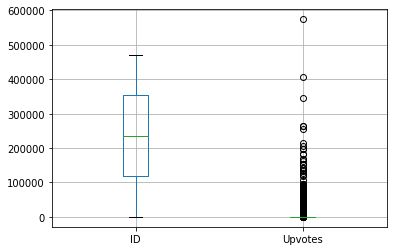

In [394]:
predictions.boxplot()
plt.show()

In [365]:
predict_2 = predictions


In [366]:
#train.drop('Tag_transform', axis = 1, inplace=True)

In [397]:
predictions.to_csv("submission1.csv",index_label=False )

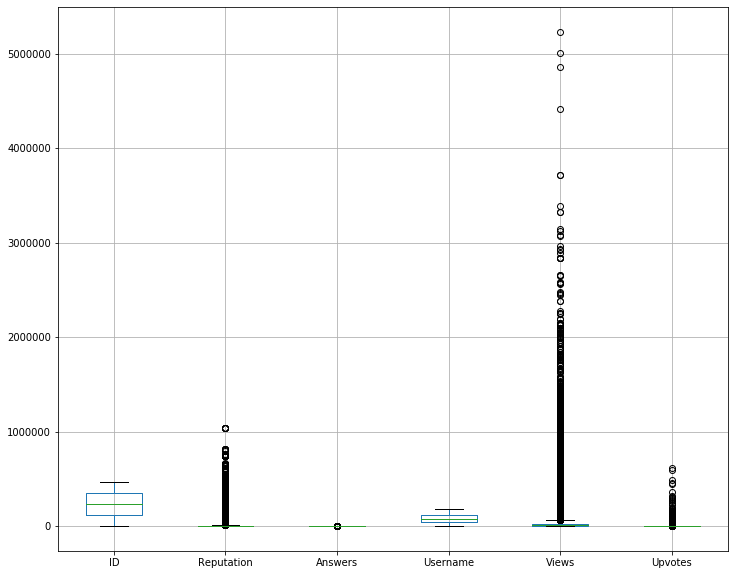

In [368]:
## Outlier treatment
plt.figure(figsize= (12,10))
train.boxplot()
plt.show()

In [396]:
predictions.describe()

,ID,Upvotes
count,141448.000000,141448.000000
mean,235743.073497,353.124632
std,136269.867118,3671.669378
min,7.000000,0.000000
25%,117797.000000,3.585884
50%,235830.000000,36.866400
75%,353616.000000,150.190817
max,471488.000000,573963.427334


### Other options

In [22]:
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV

In [408]:

estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('lr', LinearRegression()))

pipeline = Pipeline(estimators)

cv_score = cross_val_score(pipeline, X, y,scoring='neg_mean_squared_error', cv= 5)
cv_score = np.array(cv_score)
cv_score = cv_score * -1
cv_score = np.mean(np.sqrt(cv_score))
cv_score

3063.816200673156

In [412]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('lass', LassoCV()))

pipeline = Pipeline(estimators)

cv_score = cross_val_score(pipeline, X, y,scoring='neg_mean_squared_error', cv= 5)
cv_score = np.array(cv_score)
cv_score = cv_score * -1
cv_score = np.mean(np.sqrt(cv_score))
cv_score

3063.759016927315

In [413]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('ridge', RidgeCV()))

pipeline = Pipeline(estimators)

cv_score = cross_val_score(pipeline, X, y,scoring='neg_mean_squared_error', cv= 5)
cv_score = np.array(cv_score)
cv_score = cv_score * -1
cv_score = np.mean(np.sqrt(cv_score))
cv_score

3063.80097654602

In [414]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('en', ElasticNetCV()))

pipeline = Pipeline(estimators)

cv_score = cross_val_score(pipeline, X, y,scoring='neg_mean_squared_error', cv= 5)
cv_score = np.array(cv_score)
cv_score = cv_score * -1
cv_score = np.mean(np.sqrt(cv_score))
cv_score

3243.538466197332

In [35]:
from sklearn.tree import DecisionTreeRegressor
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('dtr', DecisionTreeRegressor(max_depth = 8)))

pipeline = Pipeline(estimators)

cv_scores = cross_val_score(pipeline, xtrain2, ytrain2,scoring='neg_mean_squared_error', cv= 10)
cv_score = np.array(cv_scores)
cv_score = cv_score * -1
cv_score = np.mean(np.sqrt(cv_score))
cv_score, (cv_scores*-1) ** 0.5

(1386.6144436719028,
 array([1500.6037846 , 1896.20842703, 1245.96870916, 1175.07691078,
        1786.59209293,  948.18410281, 1174.45330917, 1271.67423738,
        1232.28291344, 1635.0999494 ]))

In [37]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('dtr', GradientBoostingRegressor(n_estimators = 1000)))

pipeline = Pipeline(estimators)

cv_scores = cross_val_score(pipeline, xtrain2, ytrain2, scoring='neg_mean_squared_error', cv= 4)
cv_score = np.array(cv_scores)
cv_score = cv_score * -1
cv_score = np.mean(np.sqrt(cv_score))
cv_score, (cv_scores*-1) ** 0.5

(1353.4648859125823,
 array([1388.77745749, 1242.12075624, 1346.23312854, 1436.72820138]))

In [428]:
prediction_pipe = pipeline.fit(X,y).predict(xtest2)

In [429]:
prediction_pipe

array([237.31406309, 107.70435218,  50.14831989, ...,  55.4206733 ,
        21.68189311,  33.77284161])

In [430]:
predictions2 = pd.DataFrame({'ID': test.ID, 'Upvotes': prediction_pipe})

In [431]:
predictions2.describe()

,ID,Upvotes
count,141448.000000,141448.000000
mean,235743.073497,348.736669
std,136269.867118,3701.946824
min,7.000000,-11260.595279
25%,117797.000000,14.494083
50%,235830.000000,29.610428
75%,353616.000000,117.696769
max,471488.000000,579184.190323


In [435]:
predictions3 = predictions2

In [436]:
predictions3.Upvotes = np.ceil(predictions2.Upvotes)

In [432]:
predictions2.Upvotes = predictions2.Upvotes.clip(0)

In [433]:
predictions2.to_csv('prediction2.csv', index_label=False)

In [437]:
predictions3.to_csv('prediction3.csv', index_label=False)

In [438]:
predictions4 = predictions2
predictions4.Upvotes = np.floor(predictions2.Upvotes)
predictions4.to_csv('prediction4.csv', index_label=False)

In [439]:
predictions3.describe()

,ID,Upvotes
count,141448.000000,141448.000000
mean,235743.073497,350.272383
std,136269.867118,3701.633281
min,7.000000,0.000000
25%,117797.000000,15.000000
50%,235830.000000,30.000000
75%,353616.000000,118.000000
max,471488.000000,579185.000000


In [440]:
predictions2.describe()

,ID,Upvotes
count,141448.000000,141448.000000
mean,235743.073497,350.272383
std,136269.867118,3701.633281
min,7.000000,0.000000
25%,117797.000000,15.000000
50%,235830.000000,30.000000
75%,353616.000000,118.000000
max,471488.000000,579185.000000


In [441]:
predictions4.describe()

,ID,Upvotes
count,141448.000000,141448.000000
mean,235743.073497,350.272383
std,136269.867118,3701.633281
min,7.000000,0.000000
25%,117797.000000,15.000000
50%,235830.000000,30.000000
75%,353616.000000,118.000000
max,471488.000000,579185.000000


In [443]:
predictions.describe()

,ID,Upvotes
count,141448.000000,141448.000000
mean,235743.073497,353.124632
std,136269.867118,3671.669378
min,7.000000,0.000000
25%,117797.000000,3.585884
50%,235830.000000,36.866400
75%,353616.000000,150.190817
max,471488.000000,573963.427334


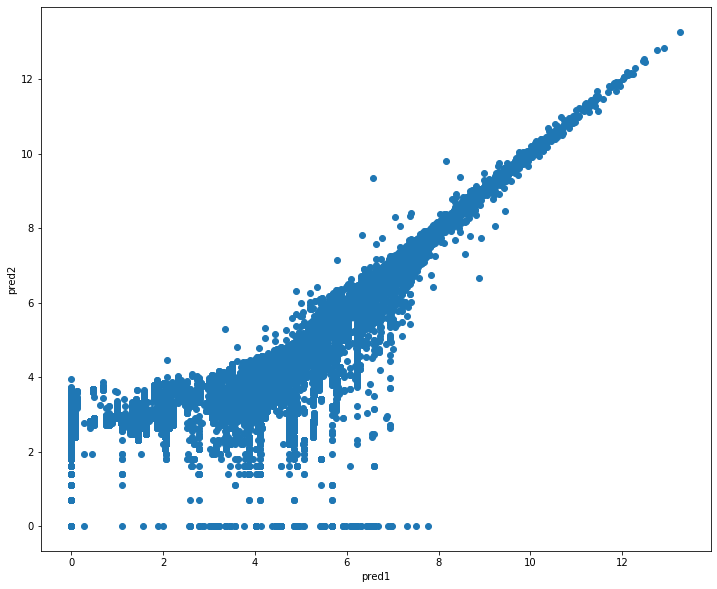

In [447]:
plt.figure(figsize=(12,10))
plt.plot(np.log1p(predictions.Upvotes), np.log1p(predictions2.Upvotes), 'o')
plt.xlabel('pred1')
plt.ylabel('pred2')
plt.show()


# Stacking regressors?



In [58]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
xtrain3 = ss.fit_transform(xtrain2)
ytrain3 = ss.fit_transform(ytrain2.values.reshape(-1,1))
xtest3 = ss.fit_transform(xtest2)

In [76]:
from sklearn.ensemble import StackingRegressor

# get a stacking ensemble of models
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('xgb', XGBRegressor()))
    level0.append(('dt', DecisionTreeRegressor()))
    level0.append(('lgb', GradientBoostingRegressor()))

    # define meta learner model
    level1 = LGBMRegressor()
    # define the stacking ensemble
    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=3)
    return model

In [77]:
# get a list of models to evaluate
def get_models():
    models = dict()
    models['xgb'] = XGBRegressor()
    models['dt'] = DecisionTreeRegressor()
    models['lgb'] = GradientBoostingRegressor()
    models['stack'] = get_stacking()
    return models

In [78]:
from sklearn.model_selection import RepeatedKFold
def evaluate_model(model):
    cv = RepeatedKFold(n_splits=5, n_repeats=2)
    scores = cross_val_score(model, xtrain2, ytrain2, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
    return scores

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

> xgb 1292.70 (694.63)
> dt 1640.62 (1187.05)
> lgb 1253.46 (776.17)
> stack 2585.93 (1927.94)


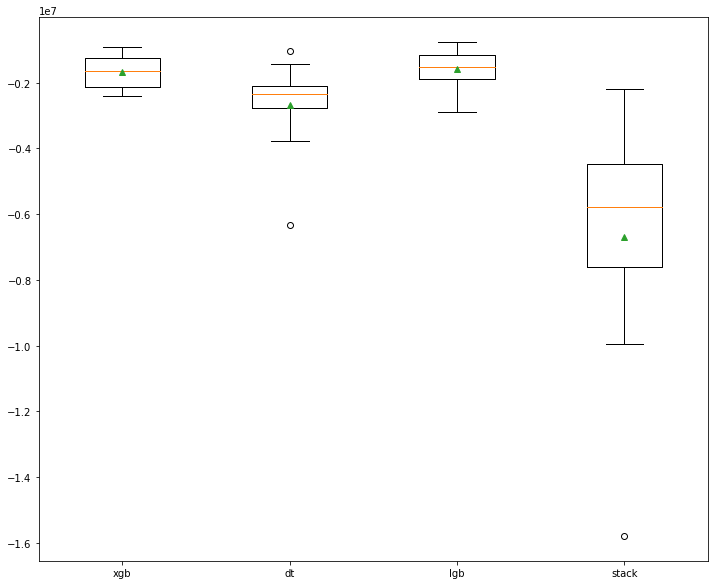

In [80]:
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('> %s %.2f (%.2f)' % (name, np.sqrt(-np.mean(scores)),
                                np.sqrt(np.std(scores))))


plt.figure(figsize = (12,10))    
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [75]:
model.fit(xtrain2, ytrain2)

[15:27:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:28:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:28:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:29:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


StackingRegressor(cv=3,
                  estimators=[('xgb',
                               XGBRegressor(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0,
                                            importance_type='gain',
                                            learning_rate=0.1, max_delta_step=0,
                                            max_depth=3, min_child_weight=1,
                                            missing=None, n_estimators=100,
                                            n_jobs=1, nthread=None,
                                            objective='reg:linear',
                                            random_state=0, reg_alpha=0,
                                            reg_la...
                                                colsample_bytree=1.0,
                       

### Running the model and fitting 

In [57]:
# define the base models
level0 = list()
level0.append(('xgb', XGBRegressor(objective='reg:squarederror')))
level0.append(('dtr', DecisionTreeRegressor()))
level0.append(('lgbm', LGBMRegressor()))

level1 = GradientBoostingRegressor()

results = []
names = []
# define the stacking ensemble
model = StackingRegressor(estimators=level0, final_estimator=level1, cv=3)
for name,each in model.items:
    score =(evaluate_model(each))
    results.append(scores)
    names.append(scores)

plt.boxplot(results, labels=names, showmeans=True)
plt.show()

AttributeError: 'StackingRegressor' object has no attribute 'items'

In [56]:
model.fit(xtrain3, ytrain3.ravel())

[13:47:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


KeyboardInterrupt: 

In [46]:
(xtrain2.columns, xtest2.columns)

(Index(['Reputation', 'Answers', 'Views', 'a', 'c', 'h', 'i', 'j', 'o', 'p',
        'r', 's', 'x'],
       dtype='object'),
 Index(['Reputation', 'Answers', 'Views', 'c', 'h', 'i', 'j', 'o', 'p', 'r',
        's', 'x'],
       dtype='object'))

In [84]:
reg = LGBMRegressor(n_estimators = 200)
X = xtrain2
y = ytrain2
cv_score = (cross_val_score(reg, X,y, cv = 20, scoring='neg_root_mean_squared_error'))
cv_score = np.array(cv_score)
cv_score = cv_score * -1
cv_score, np.mean(cv_score)

(array([1165.06815107, 2286.37586933, 2465.26547913, 3282.74785685,
        1370.94583863, 2818.7190982 , 1141.06415942, 2803.65036038,
        2454.80973422, 1586.95214958, 1886.49968444, 1921.18475047,
        1859.02101977, 1029.72449816, 1505.8270306 , 2749.7356482 ,
        1422.73764374, 1254.13814629, 1733.29347898, 2854.27501987]),
 1979.601780865764)

 ## CatBoost

In [86]:
pip install catboost

     |████████████████████████████████| 10.9 MB 3.5 MB/s eta 0:00:01
     |████████████████████████████████| 11.5 MB 13.9 MB/s eta 0:00:01
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11430 sha256=d4fc9c45f3a5ec7affefdc0686128783fb516d9002a9199132eae2215c028d09
  Stored in directory: /Users/aadarsh/Library/Caches/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
Note: you may need to restart the kernel to use updated packages.


In [87]:
from catboost import CatBoostRegressor

In [166]:
cat_reg = CatBoostRegressor(iterations=20, depth=8, learning_rate=0.1, loss_function='RMSE', l2_leaf_reg = 1.25)

In [167]:
scores = cross_val_score(cat_reg, xtrain2, ytrain2, scoring = 'neg_root_mean_squared_error', cv = 10)

scores, np.mean(scores)

0:	learn: 3375.2554239	total: 24.3ms	remaining: 461ms
1:	learn: 3156.6097253	total: 44ms	remaining: 396ms
2:	learn: 2966.5256329	total: 61.2ms	remaining: 347ms
3:	learn: 2784.8090495	total: 77.9ms	remaining: 312ms
4:	learn: 2632.3288392	total: 96.4ms	remaining: 289ms
5:	learn: 2488.8819059	total: 111ms	remaining: 259ms
6:	learn: 2368.4151676	total: 125ms	remaining: 233ms
7:	learn: 2246.7987529	total: 140ms	remaining: 210ms
8:	learn: 2147.0874192	total: 153ms	remaining: 187ms
9:	learn: 2057.7817317	total: 167ms	remaining: 167ms
10:	learn: 1978.3275031	total: 181ms	remaining: 148ms
11:	learn: 1899.2335729	total: 195ms	remaining: 130ms
12:	learn: 1837.8687969	total: 210ms	remaining: 113ms
13:	learn: 1775.7208710	total: 224ms	remaining: 96.1ms
14:	learn: 1725.5327566	total: 244ms	remaining: 81.4ms
15:	learn: 1675.9543100	total: 265ms	remaining: 66.4ms
16:	learn: 1630.9129626	total: 285ms	remaining: 50.4ms
17:	learn: 1595.8945280	total: 307ms	remaining: 34.1ms
18:	learn: 1563.2757112	total:

0:	learn: 3421.5175738	total: 20ms	remaining: 379ms
1:	learn: 3195.3667439	total: 34.9ms	remaining: 314ms
2:	learn: 3000.4875340	total: 50.3ms	remaining: 285ms
3:	learn: 2816.8920690	total: 63.7ms	remaining: 255ms
4:	learn: 2657.6174402	total: 76.7ms	remaining: 230ms
5:	learn: 2507.9327209	total: 92.6ms	remaining: 216ms
6:	learn: 2377.3328085	total: 109ms	remaining: 203ms
7:	learn: 2261.3720828	total: 125ms	remaining: 188ms
8:	learn: 2161.0903909	total: 143ms	remaining: 174ms
9:	learn: 2069.4273243	total: 159ms	remaining: 159ms
10:	learn: 1996.1020315	total: 176ms	remaining: 144ms
11:	learn: 1923.0189591	total: 192ms	remaining: 128ms
12:	learn: 1856.5236001	total: 207ms	remaining: 111ms
13:	learn: 1799.5125562	total: 225ms	remaining: 96.3ms
14:	learn: 1750.5432141	total: 243ms	remaining: 80.9ms
15:	learn: 1700.4870951	total: 261ms	remaining: 65.3ms
16:	learn: 1655.9957730	total: 280ms	remaining: 49.5ms
17:	learn: 1619.6700617	total: 297ms	remaining: 33ms
18:	learn: 1589.0950539	total: 

(array([-1834.35320037, -2574.99756552, -2055.22016501, -1227.16645977,
        -2190.99714782, -1504.97795116, -1319.44438283, -1336.66749816,
        -1445.22598242, -2083.68446623]),
 -1757.2734819283621)

In [169]:
cat_reg.fit(train.drop(['ID', 'Username'], axis =1), train.Upvotes, cat_features=train.Tag, plot=True)
plt.show()

ValueError: 'a' is not in list

In [ ]:
#cat_reg.predict(xtest2)

In [311]:
# importing libraries for polynomial transform
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# for creating pipeline
from sklearn.pipeline import Pipeline
# creating pipeline and fitting it on data


Input=[('polynomial',PolynomialFeatures(degree=3)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('polynomial',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('modal',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [315]:
vpred = pipe.predict(xtest2)

In [316]:
predd = pd.DataFrame({'ID': test.ID, 'Upvotes': vpred})
predd.Upvotes = predd.Upvotes.clip(0)
predd.to_csv("predd.csv", index_label = False)